In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
train = pd.read_csv('C:/Users/Nikose/Desktop/boston/train.csv')

In [69]:
test = pd.read_csv('C:/Users/Nikose/Desktop/boston/test.csv')

In [70]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [71]:
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [72]:
train.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [73]:
combine = [train, test]

In [74]:
train['crim'].max()

73.5341

In [75]:
train[train.crim >= 0].chas.value_counts(normalize = True)

0    0.93994
1    0.06006
Name: chas, dtype: float64

In [76]:
train[train.crim >= 0].rad.value_counts(normalize = True)

24    0.264264
5     0.228228
4     0.210210
3     0.081081
8     0.054054
2     0.042042
1     0.042042
7     0.039039
6     0.039039
Name: rad, dtype: float64

In [77]:
train.groupby('rad').crim.mean()

rad
1      0.027165
2      0.090737
3      0.096871
4      0.409221
5      0.696339
6      0.139248
7      0.156720
8      0.392734
24    11.616404
Name: crim, dtype: float64

In [78]:
train.groupby('chas').crim.mean()

chas
0    3.436787
1    2.163972
Name: crim, dtype: float64

In [79]:
train.groupby(['rad','chas']).medv.mean()

rad  chas
1    0       24.084615
     1       50.000000
2    0       22.257143
3    0       28.653846
     1       35.200000
4    0       20.740299
     1       25.366667
5    0       25.718571
     1       29.450000
6    0       20.707692
7    0       28.000000
8    0       31.921429
     1       25.825000
24   0       16.130120
     1       32.440000
Name: medv, dtype: float64

In [80]:
train[['chas', 'medv']].groupby(['chas'], as_index=False).mean().sort_values(by='medv', ascending=False)

,chas,medv
1,1,30.175000
0,0,22.295527


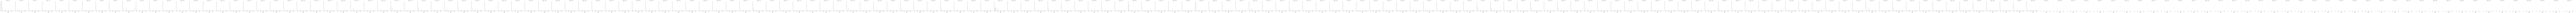

In [81]:
g = sns.FacetGrid(train, col='medv')
g.map(plt.hist, 'crim', bins=100)

In [82]:
train[['rad', 'medv']].groupby(['rad'], as_index=False).mean().sort_values(by='medv', ascending=False)

,rad,medv
7,8,30.566667
2,3,28.896296
6,7,28.000000
4,5,26.013158
0,1,25.935714
1,2,22.257143
3,4,20.938571
5,6,20.707692
8,24,17.056818


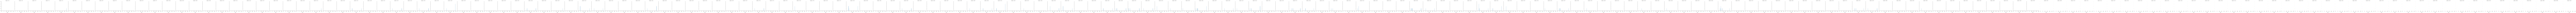

In [83]:
g = sns.FacetGrid(train, col='medv')
g.map(plt.hist, 'rad', bins=100)

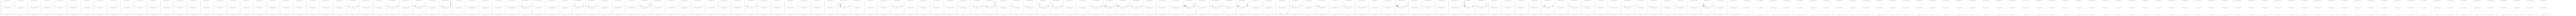

In [84]:
grid = sns.FacetGrid(train, col='medv', row='chas', size=2.2, aspect=1.6)
grid.map(plt.hist, 'rad', alpha=.5, bins=20)
grid.add_legend();

In [85]:
train['rad'].dtype

dtype('int64')

In [86]:
train['rad'] = train['rad'].replace(24, 9)
test['rad'] = test['rad'].replace(24, 9)

In [87]:
combine = [train, test]

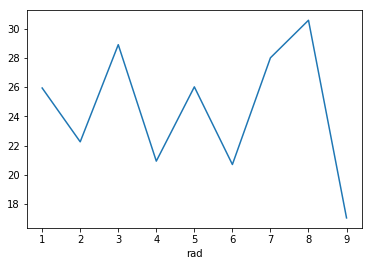

In [88]:
train.groupby(train.rad).medv.mean().plot()

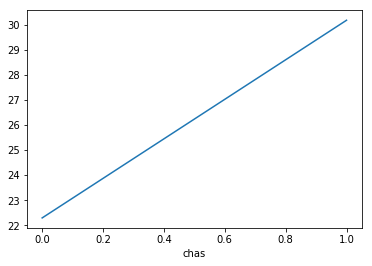

In [89]:
train.groupby(train.chas).medv.mean().plot()

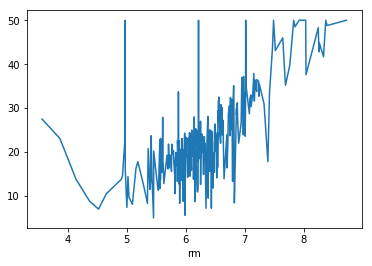

In [90]:
train.groupby(train.rm).medv.median().plot()

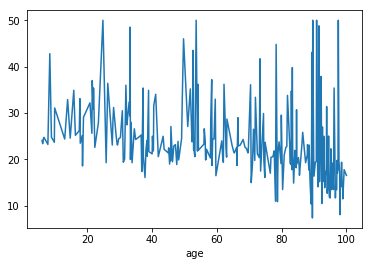

In [91]:
train.groupby(train.age).medv.mean().plot()

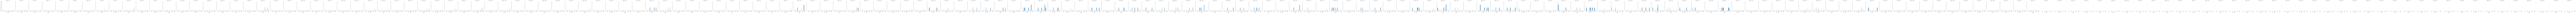

In [92]:
g = sns.FacetGrid(train, col='medv')
g.map(plt.hist, 'age', bins=20)

(array([ 14.,  18.,  25.,  23.,  24.,  23.,  24.,  30.,  44., 108.]),
 array([  6. ,  15.4,  24.8,  34.2,  43.6,  53. ,  62.4,  71.8,  81.2,
         90.6, 100. ]),
 <a list of 10 Patch objects>)

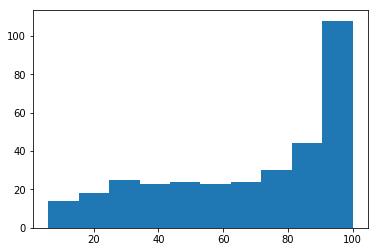

In [93]:
plt.hist(train['age'])

(array([ 13.,  34.,  51., 101.,  62.,  25.,  21.,   6.,   5.,  15.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

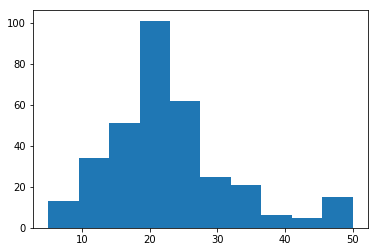

In [94]:
plt.hist(train['medv'])

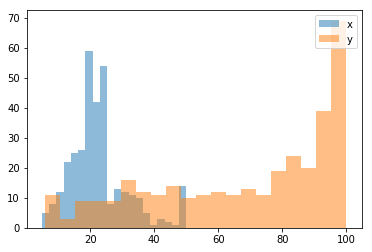

In [95]:
plt.hist(train['medv'], bins = 20, alpha=0.5, label='x')
plt.hist(train['age'], bins = 20, alpha=0.5, label='y')
plt.legend(loc='upper right')

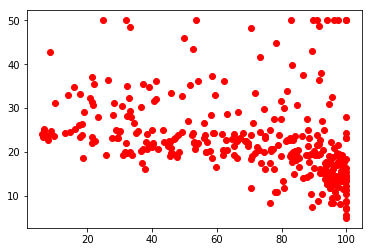

In [96]:
plt.scatter(train['age'],train['medv'] ,color = 'red')


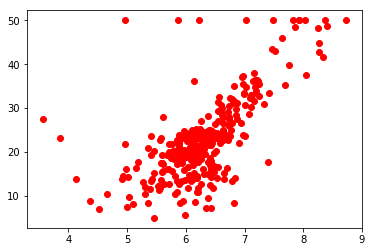

In [97]:
plt.scatter(train['rm'],train['medv'],color = 'red')

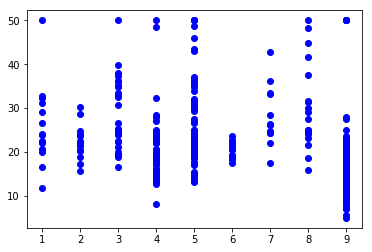

In [98]:
plt.scatter(train['rad'],train['medv'],color = 'blue')

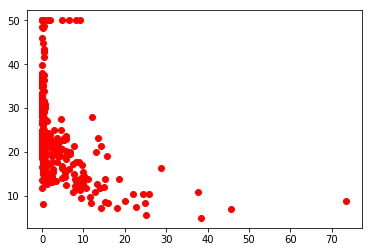

In [99]:
plt.scatter(train['crim'],train['medv'],color = 'red')

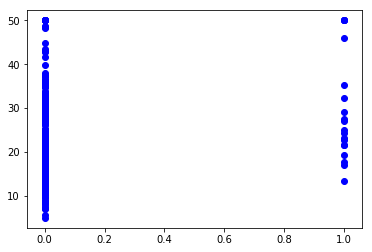

In [100]:
plt.scatter(train['chas'],train['medv'],color = 'blue')

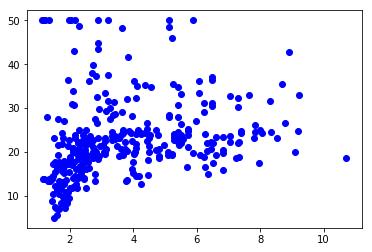

In [101]:
plt.scatter(train['dis'],train['medv'],color = 'blue')

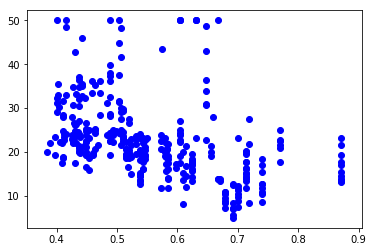

In [102]:
plt.scatter(train['nox'],train['medv'],color = 'blue')

(array([279.,  35.,   9.,   6.,   0.,   2.,   1.,   0.,   0.,   1.]),
 array([6.3200000e-03, 7.3590980e+00, 1.4711876e+01, 2.2064654e+01,
        2.9417432e+01, 3.6770210e+01, 4.4122988e+01, 5.1475766e+01,
        5.8828544e+01, 6.6181322e+01, 7.3534100e+01]),
 <a list of 10 Patch objects>)

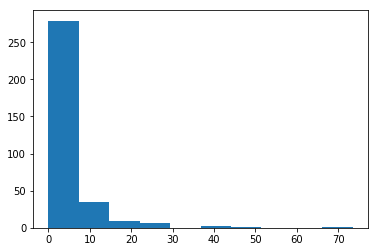

In [103]:
plt.hist(train['crim'])

(array([248.,   8.,  33.,  10.,   7.,   4.,   3.,   3.,  10.,   7.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

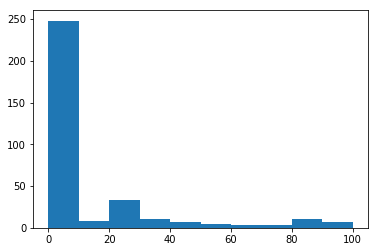

In [104]:
plt.hist(train['zn'])

(array([ 50.,  58.,  55.,  27.,  12.,   2., 109.,  10.,   0.,  10.]),
 array([ 0.74,  3.44,  6.14,  8.84, 11.54, 14.24, 16.94, 19.64, 22.34,
        25.04, 27.74]),
 <a list of 10 Patch objects>)

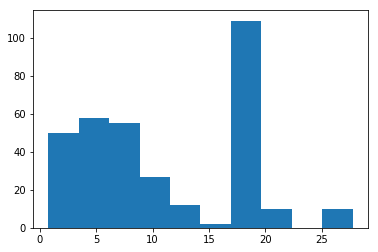

In [105]:
plt.hist(train['indus'])

(array([313.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  20.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

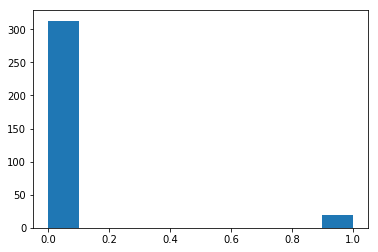

In [106]:
plt.hist(train['chas'])

(array([ 14.,  18.,  25.,  23.,  24.,  23.,  24.,  30.,  44., 108.]),
 array([  6. ,  15.4,  24.8,  34.2,  43.6,  53. ,  62.4,  71.8,  81.2,
         90.6, 100. ]),
 <a list of 10 Patch objects>)

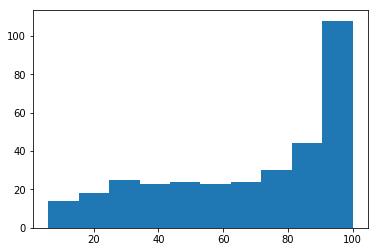

In [107]:
plt.hist(train['age'])

(array([77., 87., 48., 33., 34., 26., 15.,  8.,  4.,  1.]),
 array([ 1.1296 ,  2.08767,  3.04574,  4.00381,  4.96188,  5.91995,
         6.87802,  7.83609,  8.79416,  9.75223, 10.7103 ]),
 <a list of 10 Patch objects>)

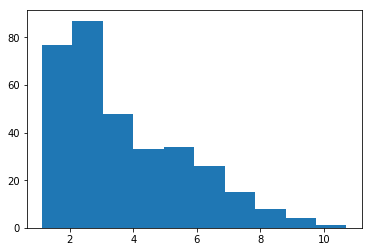

In [108]:
plt.hist(train['dis'])

In [109]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [110]:
train.drop('ID',axis =1,inplace = True)

In [111]:
train.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [112]:
X_train = train.drop("medv", axis=1)
Y_train = train["medv"]
X_test  = test.drop("ID", axis=1)
X_train.shape, Y_train.shape, X_test.shape

((333, 13), (333,), (173, 13))

In [113]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [114]:
y_pred = regressor.predict(X_test)

In [115]:
acc_log = round(regressor.score(X_train, Y_train) * 100, 2)
acc_log

97.72

In [116]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressord = DecisionTreeRegressor(random_state = 0)
regressord.fit(X_train,Y_train)

# Predicting a new result
y_predd = regressord.predict(X_test)
acc_logd = round(regressord.score(X_train, Y_train) * 100, 2)
acc_logd

100.0

In [117]:
np.corrcoef(train['age'],train['medv'])

array([[ 1.        , -0.35888827],
       [-0.35888827,  1.        ]])

In [118]:
np.corrcoef(train['crim'],train['medv'])

array([[ 1.        , -0.40745432],
       [-0.40745432,  1.        ]])

In [119]:
np.corrcoef(train['chas'],train['medv'])

array([[1.        , 0.20438999],
       [0.20438999, 1.        ]])

In [120]:
np.corrcoef(train['nox'],train['medv'])
np.corrcoef(train['rm'],train['medv'])
np.corrcoef(train['age'],train['medv'])
np.corrcoef(train['dis'],train['medv'])
np.corrcoef(train['rad'],train['medv'])

array([[ 1.        , -0.24517175],
       [-0.24517175,  1.        ]])

In [121]:
np.corrcoef(train['nox'],train['medv'])

array([[ 1.        , -0.41305415],
       [-0.41305415,  1.        ]])

In [122]:
np.corrcoef(train['rm'],train['medv'])

array([[1.        , 0.68959809],
       [0.68959809, 1.        ]])

In [123]:
np.corrcoef(train['age'],train['medv'])

array([[ 1.        , -0.35888827],
       [-0.35888827,  1.        ]])

In [124]:
np.corrcoef(train['dis'],train['medv'])

array([[1.        , 0.24942227],
       [0.24942227, 1.        ]])

In [125]:
np.corrcoef(train['rad'],train['medv'])

array([[ 1.        , -0.24517175],
       [-0.24517175,  1.        ]])

In [110]:
submission = pd.DataFrame({
        "ID": test["ID"],
        "medv": y_predd
    })

In [111]:
submission.to_csv('C:/Users/Nikose/Desktop/boston/sub2.csv', index=False)

In [113]:
X_train.shape, Y_train.shape, X_test.shape

((333, 13), (333,), (173, 13))

In [114]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [115]:
y_pred = regressor.predict(X_test)
acc_log = round(regressor.score(X_train, Y_train) * 100, 2)
acc_log

94.51

In [116]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressord = DecisionTreeRegressor(random_state = 0)
regressord.fit(X_train,Y_train)

# Predicting a new result
y_predd2 = regressord.predict(X_test)
acc_logd = round(regressord.score(X_train, Y_train) * 100, 2)
acc_logd

100.0

In [117]:
submission = pd.DataFrame({
        "ID": test["ID"],
        "medv": y_predd2
    })
submission.to_csv('C:/Users/Nikose/Desktop/boston/sub3.csv', index=False)

In [64]:
from sklearn.svm import SVR
regressor1 = SVR(kernel = 'rbf')
regressor1.fit(X_train, Y_train)
y_pred4 = regressor1.predict(X_test)

In [65]:
acc_logd = round(regressor1.score(X_train, Y_train) * 100, 2)
acc_logd

14.57

In [ ]:
submission = pd.DataFrame({
        "ID": test["ID"],
        "medv": y_predd4
    })
submission.to_csv('C:/Users/Nikose/Desktop/boston/sub4.csv', index=False)

In [126]:
from sklearn.linear_model import LinearRegression
regressor17 = LinearRegression()
regressor17.fit(X_train, Y_train)
y_pred5 = regressor17.predict(X_test)
acc_logd = round(regressor17.score(X_train, Y_train) * 100, 2)
acc_logd

72.95